In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Carregar dados
df = pd.read_csv('https://raw.githubusercontent.com/bligui/Machine-Learning-Projetos/refs/heads/main/docs/projeto2/RankingT.csv')

# Converter data
df['data'] = pd.to_datetime(df['data'])
data_inicial = df['data'].min()
df['dias_desde_inicio'] = (df['data'] - data_inicial).dt.days

# Remover ID (não ajuda no modelo)
df = df.drop(columns=['id'])

# Definir X e Y
X = df[['posicao', 'dias_desde_inicio']]
y = df['nota']

# Divisão treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Criar modelo
modelo = DecisionTreeRegressor(random_state=42)
modelo.fit(X_train, y_train)

# Avaliação
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R² (Árvore de Decisão):", round(r2, 4))


R² (Árvore de Decisão): 0.975


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        600 non-null    int64  
 1   id_filme  600 non-null    int64  
 2   nota      600 non-null    float64
 3   posicao   600 non-null    int64  
 4   data      600 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 23.6+ KB
None
               id    id_filme        nota     posicao
count  600.000000  600.000000  600.000000  600.000000
mean   300.500000   10.500000    5.583667   10.500000
std    173.349358    5.771093    2.463612    5.771093
min      1.000000    1.000000    0.000000    1.000000
25%    150.750000    5.750000    3.900000    5.750000
50%    300.500000   10.500000    5.600000   10.500000
75%    450.250000   15.250000    7.400000   15.250000
max    600.000000   20.000000   10.000000   20.000000
Missing values:
 id          0
id_filme    0
nota        0
posicao   

FileNotFoundError: [Errno 2] No such file or directory: 'docs/assets/img/nota_tempo.png'

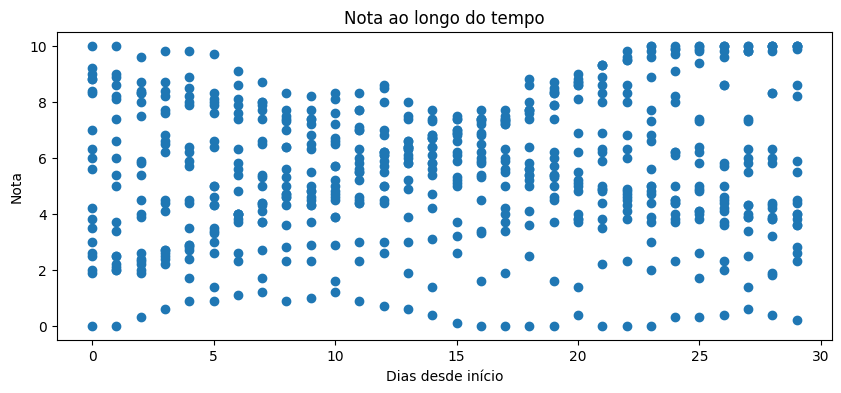

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/bligui/Machine-Learning-Projetos/refs/heads/main/docs/projeto2/RankingT.csv'

df = pd.read_csv(url)
print(df.info())
print(df.describe())
print('Missing values:\n', df.isna().sum())

# Converter data e plotar série temporal da nota
df['data'] = pd.to_datetime(df['data'])
df['dias_desde_inicio'] = (df['data'] - df['data'].min()).dt.days

plt.figure(figsize=(10,4))
plt.scatter(df['dias_desde_inicio'], df['nota'])
plt.xlabel('Dias desde início')
plt.ylabel('Nota')
plt.title('Nota ao longo do tempo')
plt.savefig('docs/assets/img/nota_tempo.png')